<a href="https://colab.research.google.com/github/quanntuit2203/CS114.O11-License-Plate-Detection/blob/main/CS114_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LÀM MỜ BIỂN SỐ XE CÓ TRONG VIDEO TRÊN MẠNG**

Thành viên thực hiện:

- Nguyễn Vũ Anh Minh - 21520350
- Hoàng Phan Thành Bách - 21520599
- Nguyễn Thường Quân - 21522498

Nhóm thực hiện đề tài và viết notebook này có sự tham khảo từ một số nguồn sau:

https://github.com/Zrmikstri/CS114.M21.KHCL.N07.

https://github.com/ultralytics/yolov5.



---



## **1** - Thực hiện liên kết Drive cá nhân để lưu dữ liệu và thực hiện một số thủ tục cài đặt thư viện

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/anhminh21/yolov5  # clone repo (repo được clone từ repo gốc Ultralytics và có thay đổi một số thông tin theo git của nhóm Zrmkikstri)
%cd yolov5
%pip install -qr requirements.txt
%pip install -q roboflow

Cloning into 'yolov5'...
remote: Enumerating objects: 13049, done.
remote: Counting objects: 100% (289/289), done.
remote: Compressing objects: 100% (216/216), done.
remote: Total 13049 (delta 145), reused 153 (delta 73), pack-reused 12760
Receiving objects: 100% (13049/13049), 14.72 MiB | 17.12 MiB/s, done.
Resolving deltas: 100% (8619/8619), done.
/content/yolov5/yolov5


- Cài đặt một số thư viện và kiểm tra đã sử dụng GPU được cấp bởi Google Colab hay chưa

In [ ]:
import os
import cv2
import imutils
import torch
import glob

from google.colab.patches import cv2_imshow
from IPython.display import Image, display, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")


Setup complete. Using torch 2.1.0+cu121 (Tesla T4)


## **2** - Cài đặt thư viện của Roboflow để lấy dữ liệu từ Roboflow

- Lưu ý rằng đã tạo bộ dữ liệu từ Roboflow, nếu chưa tạo tại đây (https://roboflow.com)

- Sau khi cập nhật lại bộ dataset được gán nhãn từ Roboflow, tiến hành chạy 4 cells này.

In [ ]:
from roboflow import Roboflow

In [ ]:
os.environ["DATASET_DIRECTORY"] = "/content/datasets"

In [ ]:
rf = Roboflow(api_key="w8tvYodOoFXEneSiypNC")
project = rf.workspace("projectcs114").project("license-plate-detection-uqzqt")
dataset = project.version(3).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to /content/datasets/License-Plate-Detection-3 in yolov5pytorch:: 100%|██████████| 6968/6968 [00:01<00:00, 3740.11it/s]


In [ ]:
with open('/content/datasets/License-Plate-Detection-3/data.yaml','a+') as yamlfile:
        yamlfile.write('\ntest: /content/datasets/License-Plate-Detection-3/test/images')

## **3** - Bắt đầu tiến hành train mô hình
Trước khi tiến hành train ta cần hiểu rõ các tham số sẽ được truyền vào file **train.py** có chức năng như thế nào

-  **weights**: cho phép người dùng sử dụng các trọng số (weight) đã được train sẵn, ta chỉ tiến hành thực hiện transfer learning. Có rất nhiều weight để người dùng lựa chọn tùy theo mục đích sử dụng. Ở đây nhóm chọn sử dụng weight ‘yolov5.pt’. Có thể tham khảo thêm tại repo gốc của Ultralytics (https://github.com/ultralytics/yolov5)

- **img**: kích thước ảnh đầu vào theo tiêu chuẩn của yolov5l là 640.

- **batch-size**: được định nghĩa là số lượng mẫu dữ liệu trong một lần train. Ở đây nhóm chọn tham số là -1 để mô hình tự tính toán kích thước của batch. Mặc định batch-size được đặt là 32.

- **epochs**: số epoch dùng để train mô hình.Ở đây nhóm chọn epochs là 150 để thuận tiện cho việc đánh giá với một mô hình Yolov5 khác sau này.

- **data**: là đường dẫn của dataset của nhóm, được lưu tại {dataset.location}.

- **cache**: cache hình ảnh để việc training diễn ra nhanh hơn.

- **project**: đường dẫn của thư mục, nơi chịu trách nhiệm lưu trự các thư mục chạy thử.

- **name**: tên thư mục lưu kết quả.

Ngoài ra còn một số tham số khác mà nhóm không dùng đến, có thể tham khảo thêm ở repo gốc của Ultralytics (https://github.com/ultralytics/yolov5)

Tiến hành chạy file “train.py” với các tham số được truyền vào để tiến hành train dữ liệu.

**NOTE**: Đây là file nhóm đã train có thể tham khảo qua. Không chạy lại code train để tránh mất kết quả

In [ ]:
!python train.py --weights yolov5l.pt --img 640 --batch-size -1 --epochs 150 --data {dataset.location}/data.yaml  --cache --project "/content/drive/MyDrive/Pro_Cs114" --name Save_RS


2024-01-24 15:38:35.828431: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 15:38:35.828482: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 15:38:35.829818: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 15:38:36.886501: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5l.pt, cfg=, data=/content/datasets/License-Plate-Detection-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=-1, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, n

Khi tiến hành train trên Google Colab, do được cấp một thời gian nhất định nên sẽ có thời điểm bị timeout. Chính vì vậy, Ultralytics hỗ trợ các checkpoint – đồng nghĩa với việc mô hình sẽ lưu weight có kết quả tốt nhất trước khi bị timeout dưới tên **best.pt** và weight của epoch cuối cùng trước khi timeout dưới tên **last.pt**. Nhờ đó nhóm có thể tiếp tục phần train bị tạm dừng trước đó do vấn đề timeout. Mô hình tiếp tục train đến hết thời gian Google Colab cho phép hoặc đến hết số epochs đã cài đặt. Để thực hiện việc này tiến hành chạy file **“train.py”**  và truyền vào tham số **“resume”** và đường dẫn tới thư mục **last.pt**. Code được trình bày phía bên dưới:

In [ ]:
!python train.py --resume /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt

2024-01-24 16:57:09.661465: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 16:57:09.661521: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 16:57:09.662971: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 16:57:10.943137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt, nosave=False, noval=False, noaut

In [ ]:
!python train.py --resume /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt

2024-01-24 17:31:59.599850: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-24 17:31:59.599908: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-24 17:31:59.601835: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-24 17:32:01.455004: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=data/coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=16, imgsz=640, rect=False, resume=/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/last.pt, nosave=False, noval=False, noaut

## **4** - Đánh giá mô hình trên tập Valid

- Bắt đầu từ bước này sẽ thực hiện đánh giá mô hình
- Để đánh giá mô hình, nhóm sử dụng YOLOv5 để thực hiện phần đánh giá dựa trên tập dữ liệu bằng cách thực thi file **“val.py”** cùng với một số thông số truyền vào được mô tả như sau:
  - **“weights”**: truyền vào đường dẫn chỉ tới file best.pt nơi lưu weight có kết quả train tốt nhất.
  - **“data”**: đường dẫn tới tập dataset được lưu tại dataset.location.
  - **“task”**: yêu cầu thực hiện một số công việc có thể chọn lựa: val (đánh giá trên tập validation), test (đánh giá trên tập test).
  - **“iou-thres”**: truyền vào tham số 0.5, chức năng được trình bày ở ngay phía trên.
- -	Ngoài ra còn một số tham số khác mà nhóm không dùng đến, có thể tham khảo thêm ở repo gốc của Ultralytics (https://github.com/ultralytics/yolov5)

In [ ]:
!python val.py --weights /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt --data {dataset.location}/data.yaml --task val --iou-thres 0.5


val: data=/content/datasets/License-Plate-Detection-3/data.yaml, weights=['/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
100% 755k/755k [00:00<00:00, 26.4MB/s]
val: Scanning '/content/datasets/License-Plate-Detection-3/valid/labels' images and labels...684 found, 0 missing, 0 empty, 0 corrupt: 100% 684/684 [00:00<00:00, 1828.12it/s]
val: New cache created: /content/datasets/License-Plate-Detection-3/valid/labels.cache
               Class     Images     Labels          P          R     mAP@.5    mAP@.75 mAP@.5:.95: 100% 22/22 

- Sau khi đánh giá xong kết quả được lưu tại **runs/val/exp**. Ultralytics hỗ trợ người dùng tính toán các giá trị cho Precision - Recall - F1_score - Confusion Matrix, đồng thời cũng hỗ trợ người dùng vẽ các biểu đồ tương quan.

- Chạy đoạn code bên dưới để tiến hành show các ảnh đồ thị ra bên ngoài.

R_CURVE.PNG


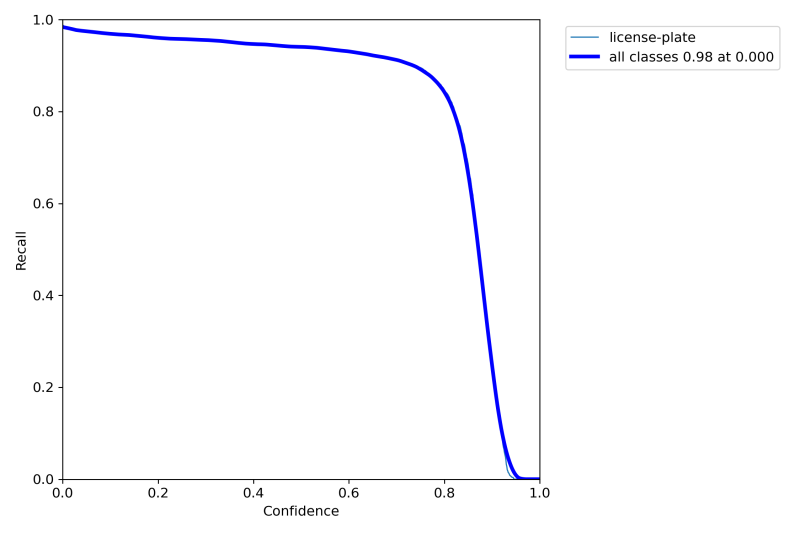





F1_CURVE.PNG


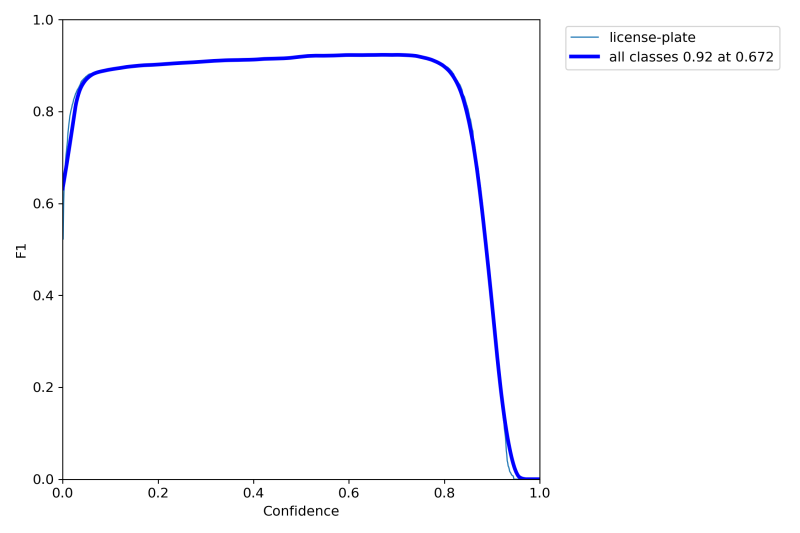





PR_CURVE.PNG


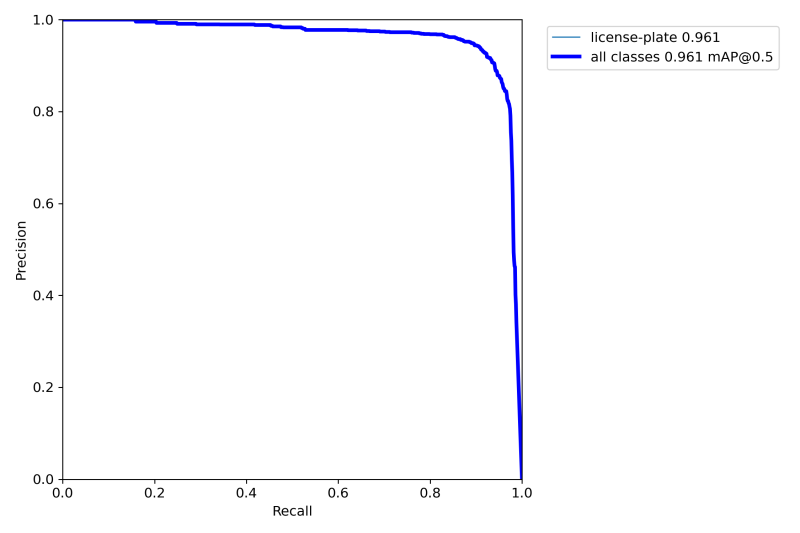





P_CURVE.PNG


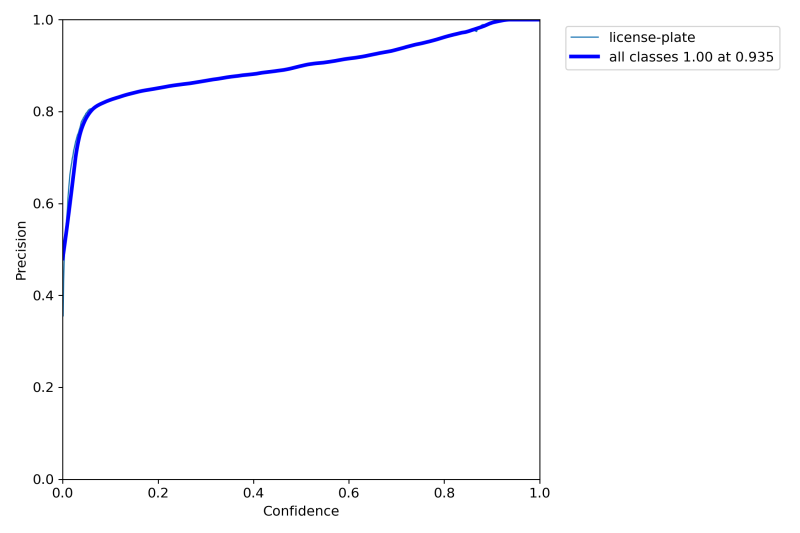





CONFUSION_MATRIX.PNG


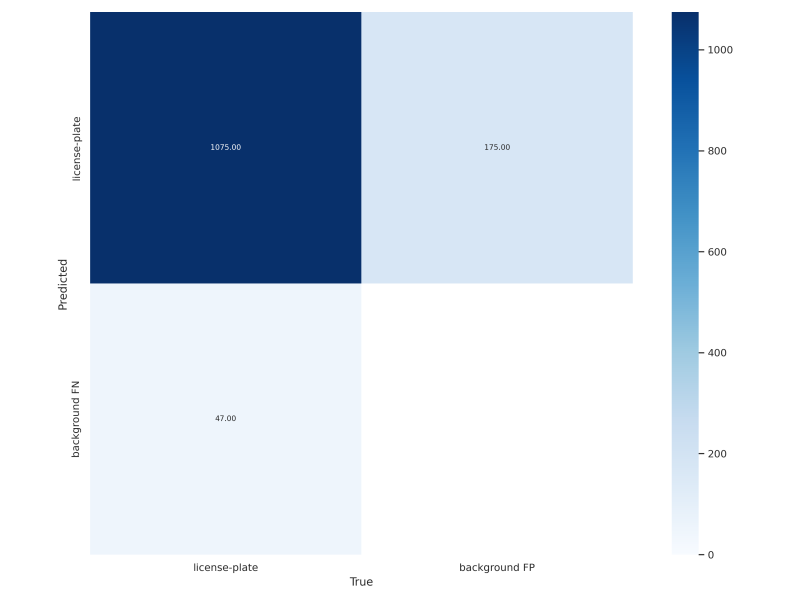

In [ ]:
for imageName in glob.glob('/content/yolov5/runs/val/exp/*.png'):
    print(os.path.basename(imageName).upper())
    img = cv2.imread(imageName)
    img = imutils.resize(img, width=800)
    cv2_imshow(img)
    print('\n\n\n')

## **5** - Đánh giá mô hình trên tập Test
- Để đánh giá mô hình, nhóm sử dụng YOLOv5 để thực hiện phần đánh giá dựa trên tập dữ liệu bằng cách thực thi file **“val.py”** cùng với một số thông số truyền vào được mô tả như sau:
  - **“weights”**: truyền vào đường dẫn chỉ tới file best.pt nơi lưu weight có kết quả train tốt nhất.
  - **“data”**: đường dẫn tới tập dataset được lưu tại dataset.location.
  - **“task”**: yêu cầu thực hiện một số công việc có thể chọn lựa: val (đánh giá trên tập validation), test (đánh giá trên tập test).
  - **“iou-thres”**: truyền vào tham số 0.5, chức năng được trình bày ở ngay phía trên.
- -	Ngoài ra còn một số tham số khác mà nhóm không dùng đến, có thể tham khảo thêm ở repo gốc của Ultralytics (https://github.com/ultralytics/yolov5)

In [ ]:
!python val.py --weights /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt --data {dataset.location}/data.yaml --task test --iou-thres 0.5


val: data=/content/datasets/License-Plate-Detection-3/data.yaml, weights=['/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.5, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
test: Scanning '/content/datasets/License-Plate-Detection-3/test/labels' images and labels...341 found, 0 missing, 0 empty, 0 corrupt: 100% 341/341 [00:00<00:00, 1915.23it/s]
test: New cache created: /content/datasets/License-Plate-Detection-3/test/labels.cache
               Class     Images     Labels          P          R     mAP@.5    mAP@.75 mAP@.5:.95: 100% 11/11 [00:15<00:00,  1.44s/it]
             

- Sau khi đánh giá xong kết quả được lưu tại **runs/val/exp**. Ultralytics hỗ trợ người dùng tính toán các giá trị cho Precision - Recall - F1_score - Confusion Matrix, đồng thời cũng hỗ trợ người dùng vẽ các biểu đồ tương quan.

- Chạy đoạn code bên dưới để tiến hành show các ảnh đồ thị ra bên ngoài.

R_CURVE.PNG


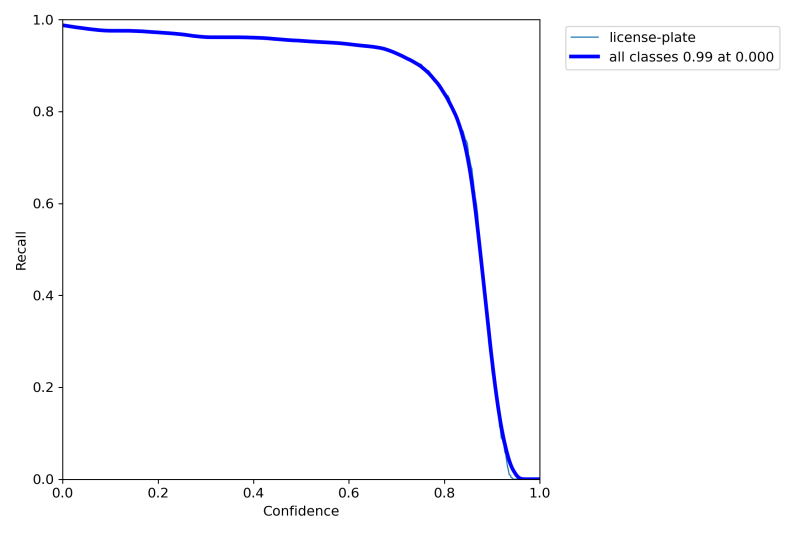





F1_CURVE.PNG


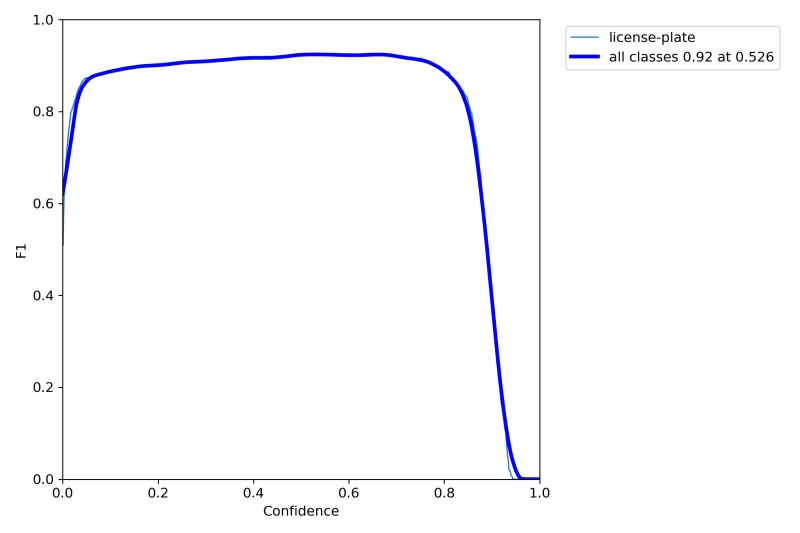





PR_CURVE.PNG


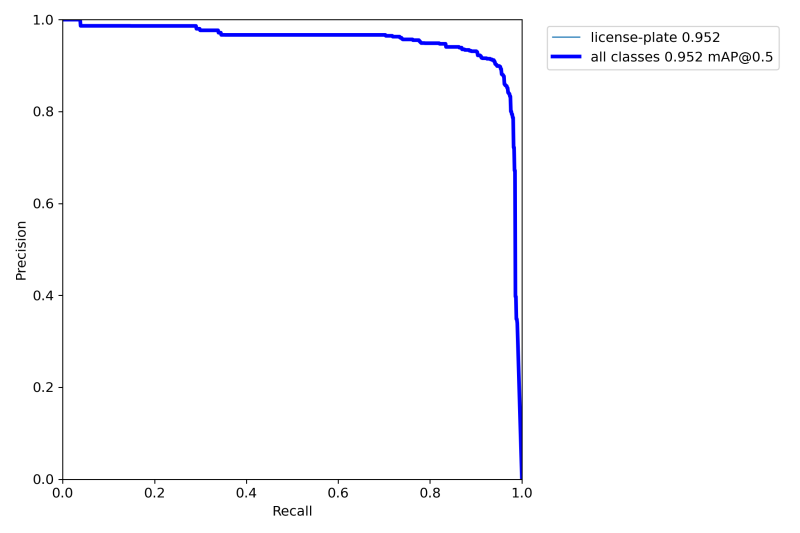





P_CURVE.PNG


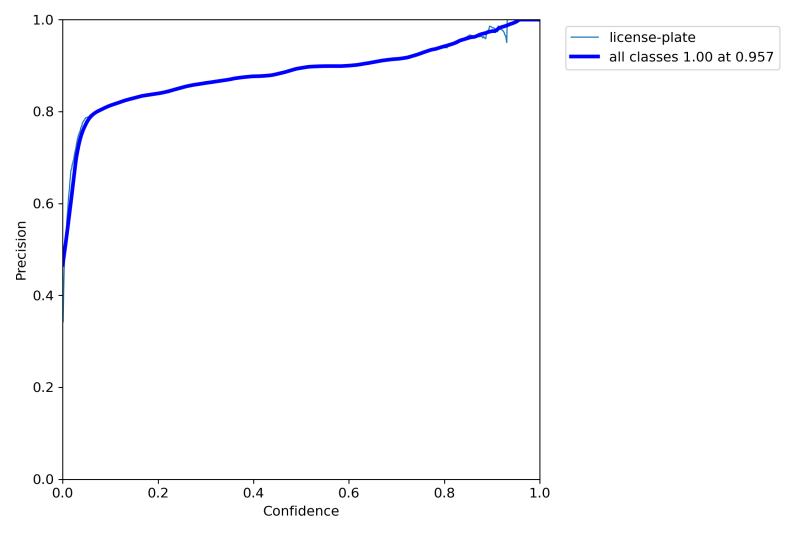





CONFUSION_MATRIX.PNG


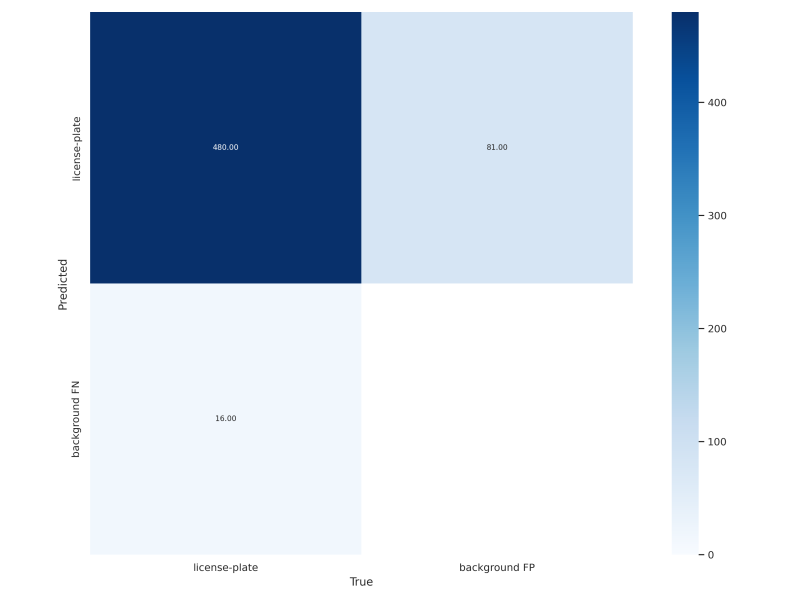

In [ ]:
for imageName in glob.glob('runs/val/exp2/*.png'):
    print(os.path.basename(imageName).upper())
    img = cv2.imread(imageName)
    img = imutils.resize(img, width=800)
    cv2_imshow(img)
    print('\n\n\n')

## **6** - Kiểm tra mô hình

- Thực thi file **"detect.py"** với tham số được truyền vào như sau:
  - **“weights”**: truyền vào đường dẫn chỉ tới file best.pt nơi lưu weight có kết quả train tốt nhất.

  - **“source”**: truyền vào đường dẫn video định dạng **mp4**, ngoài ra còn có các định dạng khác như:
                         0                               # webcam
                         img.jpg                         # image
                         vid.mp4                         # video
                         screen                          # screenshot
                         path/                           # directory
                         list.txt                        # list of images
                         list.streams                    # list of streams
                         'path/*.jpg'                    # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream


In [ ]:
!python detect.py --weights /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt --img 640 --source /content/drive/MyDrive/Pro_Cs114/testing-video.mp4

detect: weights=['/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt'], source=/content/drive/MyDrive/Pro_Cs114/testing-video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
video 1/1 (1/542) /content/drive/MyDrive/Pro_Cs114/testing-video.mp4: 384x640 2 license-plates, Done. (0.054s)
video 1/1 (2/542) /content/drive/MyDrive/Pro_Cs114/testing-video.mp4: 384x640 2 license-plates, Done. (0.032s)
video 1/1 (3/542) /content/drive/MyDrive/Pro_Cs114/testing-video

- Thực thi file **"detect.py"** với tham số được truyền vào như sau:
  - **“weights”**: truyền vào đường dẫn chỉ tới file best.pt nơi lưu weight có kết quả train tốt nhất.

  - **“source”**: truyền vào đường dẫn video định dạng **mp4**, ngoài ra còn có các định dạng khác như:
                         0                               # webcam
                         img.jpg                         # image
                         vid.mp4                         # video
                         screen                          # screenshot
                         path/                           # directory
                         list.txt                        # list of images
                         list.streams                    # list of streams
                         'path/*.jpg'                    # glob
                         'https://youtu.be/LNwODJXcvt4'  # YouTube
                         'rtsp://example.com/media.mp4'  # RTSP, RTMP, HTTP stream
  - **"censor"**: Gọi tham số ngày đồng nghĩa việc thực hiện che mờ các vùng được nhận diện là biển số
  

In [ ]:
!python detect.py --weights /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt --censor --img 640 --source /content/drive/MyDrive/Pro_Cs114/testing-video.mp4


detect: weights=['/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt'], source=/content/drive/MyDrive/Pro_Cs114/testing-video.mp4, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=True, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
video 1/1 (1/542) /content/drive/MyDrive/Pro_Cs114/testing-video.mp4: 384x640 2 license-plates, Done. (0.064s)
video 1/1 (2/542) /content/drive/MyDrive/Pro_Cs114/testing-video.mp4: 384x640 2 license-plates, Done. (0.038s)
video 1/1 (3/542) /content/drive/MyDrive/Pro_Cs114/testing-video.

- Ngoài ra chúng ta có thể kiểm tra với từng ảnh riêng biệt bằng đoạn code bên dưới

detect: weights=['/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt'], source=/content/drive/MyDrive/Pro_Cs114/Testing/test-img.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/drive/MyDrive/Pro_Cs114/Testing/test-img.jpg: 384x640 5 license-plates, Done. (0.051s)
Speed: 0.5ms pre-process, 51.2ms inference, 555.1ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


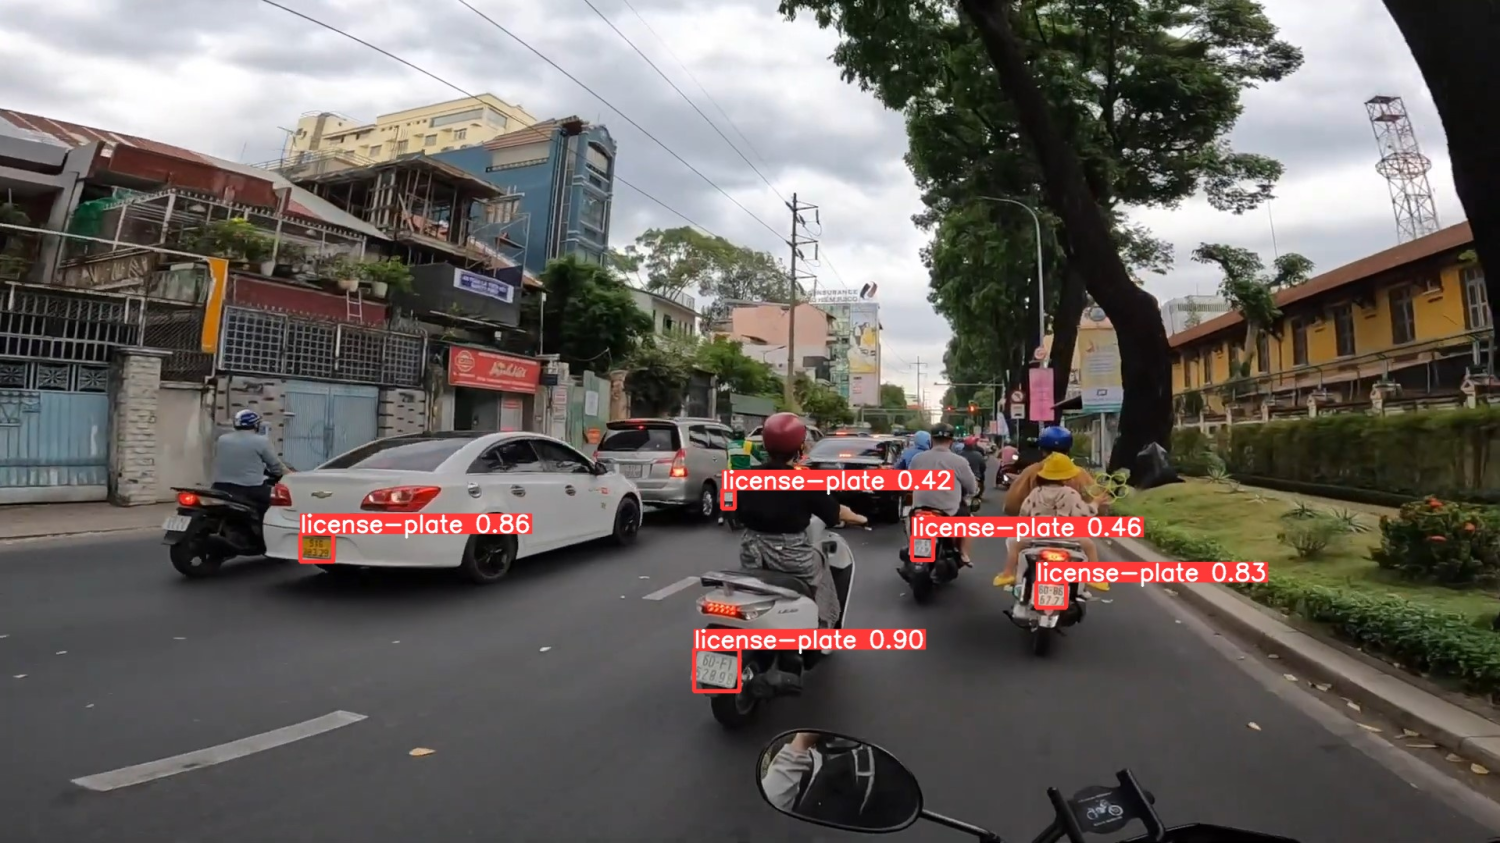

In [18]:
!python detect.py --weights /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt --img 640 --source /content/drive/MyDrive/Pro_Cs114/Testing/test-img.jpg
img = cv2.imread('/content/yolov5/runs/detect/exp/test-img.jpg')
img = imutils.resize(img, width=1500)
cv2_imshow(img)

detect: weights=['/content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt'], source=/content/drive/MyDrive/Pro_Cs114/Testing/test-img.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, censor=True, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-268-gecc2bde Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/drive/MyDrive/Pro_Cs114/Testing/test-img.jpg: 384x640 5 license-plates, Done. (0.054s)
Speed: 0.6ms pre-process, 54.2ms inference, 564.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp2


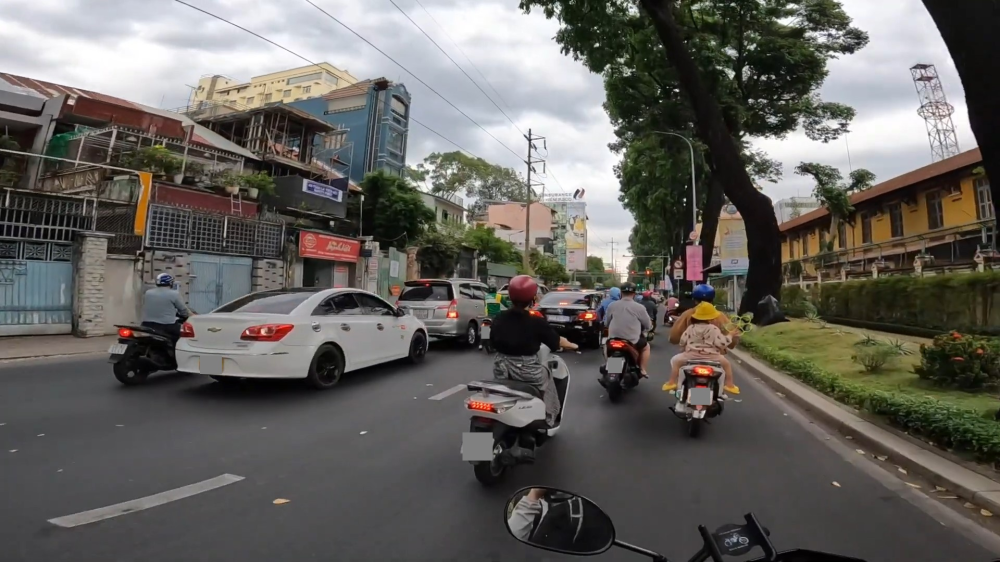

In [19]:
!python detect.py --weights /content/drive/MyDrive/Pro_Cs114/Save_RS5/weights/best.pt --censor --img 640 --source /content/drive/MyDrive/Pro_Cs114/Testing/test-img.jpg
img = cv2.imread('/content/yolov5/runs/detect/exp2/test-img.jpg')
img = imutils.resize(img, width=1000)
cv2_imshow(img)